<a href="https://colab.research.google.com/github/farhan1503001/Deep-Learning-Rhyme-Projects/blob/main/Neural_Style_Transfer_Using_Deep_Learning(Pytorch_version).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Deep Learning with PyTorch : Neural Style Transfer

## Task 1 : Set Google Colab runtime

In [2]:
!pip install torch torchvision

In [22]:
!git clone https://github.com/parth1620/Project-NST.git

fatal: destination path 'Project-NST' already exists and is not an empty directory.


## Task 2 : Loading VGG Pretrained Model

In [23]:
import torch
from torchvision import models

In [24]:
vgg=models.vgg19(pretrained=True)

In [25]:
print(vgg)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padd

In [26]:
vgg=vgg.features
print(vgg)

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (17): ReLU(inplace=True)
  (18): MaxPoo

In [27]:
#First check if cude device is available for vgg model
device=torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [28]:
#Set all training parameters as false as we want to keep layer weights freezed
for parameter in vgg.parameters():
  parameter.requires_grad_(False)
  

In [29]:
#Now if cuda available take the device towards GPU
vgg.to(device)

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (17): ReLU(inplace=True)
  (18): MaxPoo

## Task 3 : Preprocess image

Torchvision models page : https://pytorch.org/docs/stable/torchvision/models.html

In [30]:
import PIL
from torchvision import transforms 

#Now writing an image pre-processor function

def pre_processor(path,max_size=500):
  image=PIL.Image.open(fp=path).convert('RGB')

  if max(image.size)>max_size:
    size=max_size
  else:
    size=max(image.size)
  transformer=transforms.Compose(
      [
       transforms.Resize(size),
       transforms.ToTensor(),
       transforms.Normalize(
           mean=[0.485,0.456,0.456],
           std=[0.229,0.224,0.225]
       )
      ]
  )

  image=transformer(image)

  image=image.unsqueeze(0)#Providing an additional dimension as 0 axis

  return image
  


In [31]:
content_p=pre_processor(path='/content/Project-NST/content11.jpg')
style_p=pre_processor(path='/content/Project-NST/style12.jpg')

#Moving content and style tensor to GPU
content_p.to(device)
style_p.to(device)

print("Content image shape ",content_p.shape)
print("Style image shape ",style_p.shape)



Content image shape  torch.Size([1, 3, 259, 345])
Style image shape  torch.Size([1, 3, 625, 500])


## Task 4 : Deprocess image

In [32]:
import numpy as np
import matplotlib.pyplot as plt

def decompresser(tensor):
  #Convert the image from tensor to numpy array
  image=tensor.to('cpu').clone()
  image=image.numpy()
  #Now unsqueeze the image or remove extra batch dimension
  image=image.squeeze(0)#Converts tensor image of 1,3,224,224 to 3,224,224
  image=image.transpose(1,2,0)#3*224*224 to 224*224*3
  #Now denormalize the image
  image=image*np.array([0.229,0.224,0.225])+np.array([0.485,0.456,0.456])

  image=image.clip(0,1)

  return image



In [33]:
content_d=decompresser(content_p)
style_d=decompresser(style_p)

print("Shape of Decompressed content ",content_d.shape)
print("Shape of Decompressed_style ",style_d.shape)

Shape of Decompressed content  (259, 345, 3)
Shape of Decompressed_style  (625, 500, 3)


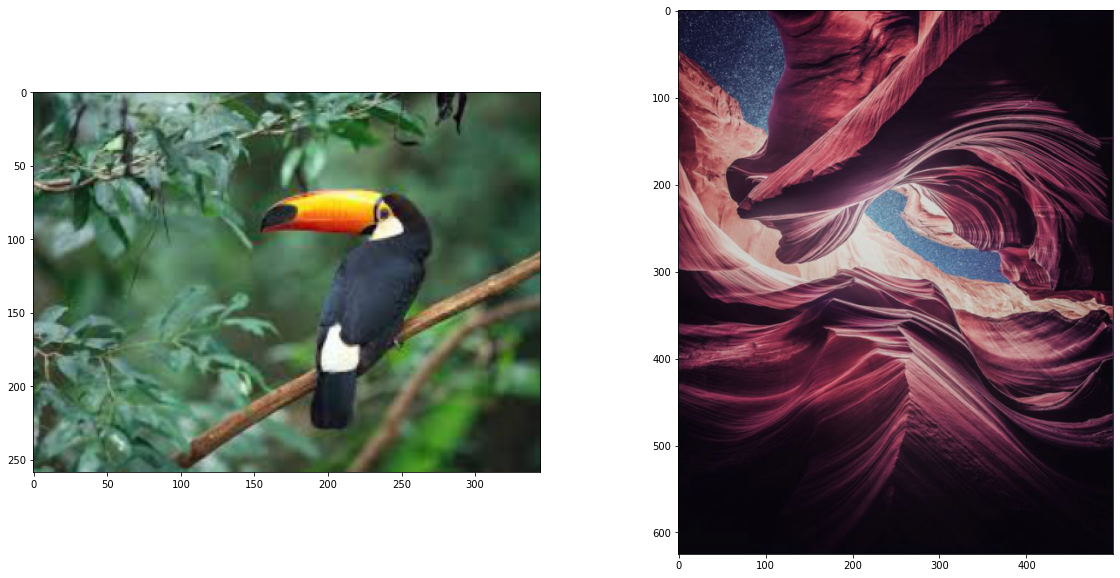

In [34]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,10))
ax1.imshow(content_d)
ax2.imshow(style_d)

## Task 5 : Get content,style features and create gram matrix

In [43]:
#Now we will find the features for content and style images and here is the function for that

def get_features(image,torchmodel):
  

  layers={
      '0': 'conv1_1',
      '5':'conv2_1',
      '10':'conv3_1',
      '19':'conv4_1',
      '21':'conv4_2',#content feature
      '28':'conv5_1'
  }

  x=image
  x=x.cuda()
  Features={}
  for name,layer in torchmodel._modules.items():
    x=layer(x)
    if name in layers:
      Features[layers[name]]=x
  return Features

In [49]:
#Now see what content and style feature we get
content_f=get_features(content_p,vgg)
style_f=get_features(style_p,vgg)

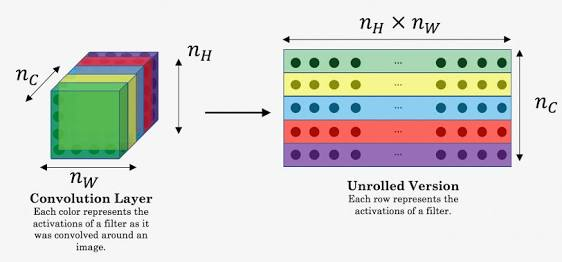

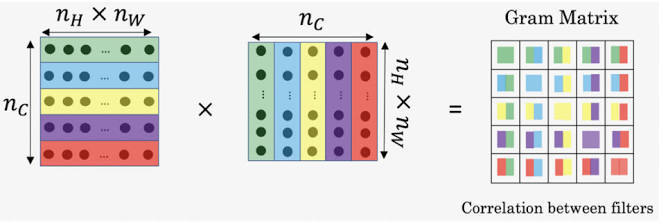

In [52]:
#Now finding the gram matrix
def get_gram(tensor):
  b,c,h,w=tensor.size() # tensor has 1*3*224*224 format
  tensor=tensor.view(c,h*w)
  gram=torch.matmul(tensor,tensor.t())

  return gram

In [53]:
style_g={layer: get_gram(style_f[layer]) for layer in style_f}

In [54]:
style_g

{'conv1_1': tensor([[5.7361e+03, 3.6579e+03, 4.2437e+03,  ..., 8.5402e+01, 1.8130e+03,
          3.8366e+03],
         [3.6579e+03, 1.8167e+05, 3.7979e+03,  ..., 9.5025e+03, 4.6005e+04,
          7.4099e+04],
         [4.2437e+03, 3.7979e+03, 6.0445e+03,  ..., 7.2599e+00, 2.8903e+03,
          6.3244e+03],
         ...,
         [8.5402e+01, 9.5025e+03, 7.2599e+00,  ..., 1.9932e+04, 1.0076e+04,
          9.1583e+03],
         [1.8130e+03, 4.6005e+04, 2.8903e+03,  ..., 1.0076e+04, 6.2664e+04,
          3.9285e+04],
         [3.8366e+03, 7.4099e+04, 6.3244e+03,  ..., 9.1583e+03, 3.9285e+04,
          7.6009e+04]], device='cuda:0'),
 'conv2_1': tensor([[124006.7969,   6909.0293,  91012.5703,  ...,   3029.1162,
           25556.1328,  34795.5234],
         [  6909.0293,  47353.1875,  32110.4512,  ...,   9980.1738,
           17377.8535,  15693.0156],
         [ 91012.5703,  32110.4512, 287368.6562,  ...,  22032.4355,
           11810.6240,  47464.3203],
         ...,
         [  3029.1162,

## Task 6 : Creating Style and Content loss function

In [55]:
#Now we will define two types of loss content and Loss function 
#Here content layer are 4_2 so loss will be according to that .
def content_loss(target_conv4_2,content_conv4_2):
  loss=torch.mean((content_conv4_2-target_conv4_2)**2)
  return loss

In [58]:
#Style weights are concerned with all other layers except 4_2 here target image 
style_weights={
    'conv1_1': 1.0,
    'conv2_1': 0.75,
    'conv3_1': 0.2,
    'conv4_1':0.2,
    'conv5_1':0.2
}

In [68]:
def style_loss(style_weights,target_features,style_gram):
  loss=0.0
  for layer in style_weights:
    target_f=target_features[layer]
    target_g=get_gram(target_f)
    style_g=style_gram[layer]
    b,c,h,w=target_f.shape
    layer_loss=style_weights[layer]*torch.mean((target_g-style_g)**2)
    loss=loss+layer_loss/(c*h*w)
  return loss



In [105]:
target=content_p.clone().requires_grad_(True)
target_features=get_features(target,vgg)
print("Content Loss : ",content_loss(target_conv4_2=target_features['conv4_2'],content_conv4_2=content_f['conv4_2']))
print("Style Loss : ",style_loss(style_weights,target_features,style_g))

Content Loss :  tensor(0., device='cuda:0', grad_fn=<MeanBackward0>)
Style Loss :  tensor(1636.6016, device='cuda:0', grad_fn=<AddBackward0>)


In [106]:
target.is_leaf

True

## Task 7 : Training loop

In [107]:
#Now we will train it our starting point will be our own content image
from torch import optim
#Defining optimizer
optimizer=optim.Adam([target],lr=0.03)

alpha=1 #Content Reconstruction weight
beta=1e5

epochs=3000

steps=500


In [108]:
def total_loss(s_loss,c_loss):
  total_loss=alpha*c_loss+beta*s_loss
  return total_loss

In [109]:
results=[]
for i in range(epochs):
  target_feature=get_features(target,vgg)
  c_loss=content_loss(target_conv4_2=target_feature['conv4_2'],content_conv4_2=content_f['conv4_2'])
  s_loss=style_loss(style_weights,target_feature,style_g)
  t_loss=total_loss(s_loss,c_loss)

  #Now starting the optimizer
  optimizer.zero_grad()
  t_loss.backward()
  optimizer.step()#Performs single optimization step

  if i%steps==0:
    print("Total loss at epoch ",i," is :",t_loss)
    results.append(decompresser(target.detach()))

Total loss at epoch  0  is : tensor(1.6366e+08, device='cuda:0', grad_fn=<AddBackward0>)
Total loss at epoch  500  is : tensor(6592663., device='cuda:0', grad_fn=<AddBackward0>)
Total loss at epoch  1000  is : tensor(4608662.5000, device='cuda:0', grad_fn=<AddBackward0>)
Total loss at epoch  1500  is : tensor(3992489.7500, device='cuda:0', grad_fn=<AddBackward0>)
Total loss at epoch  2000  is : tensor(3683773.5000, device='cuda:0', grad_fn=<AddBackward0>)
Total loss at epoch  2500  is : tensor(3493492.7500, device='cuda:0', grad_fn=<AddBackward0>)


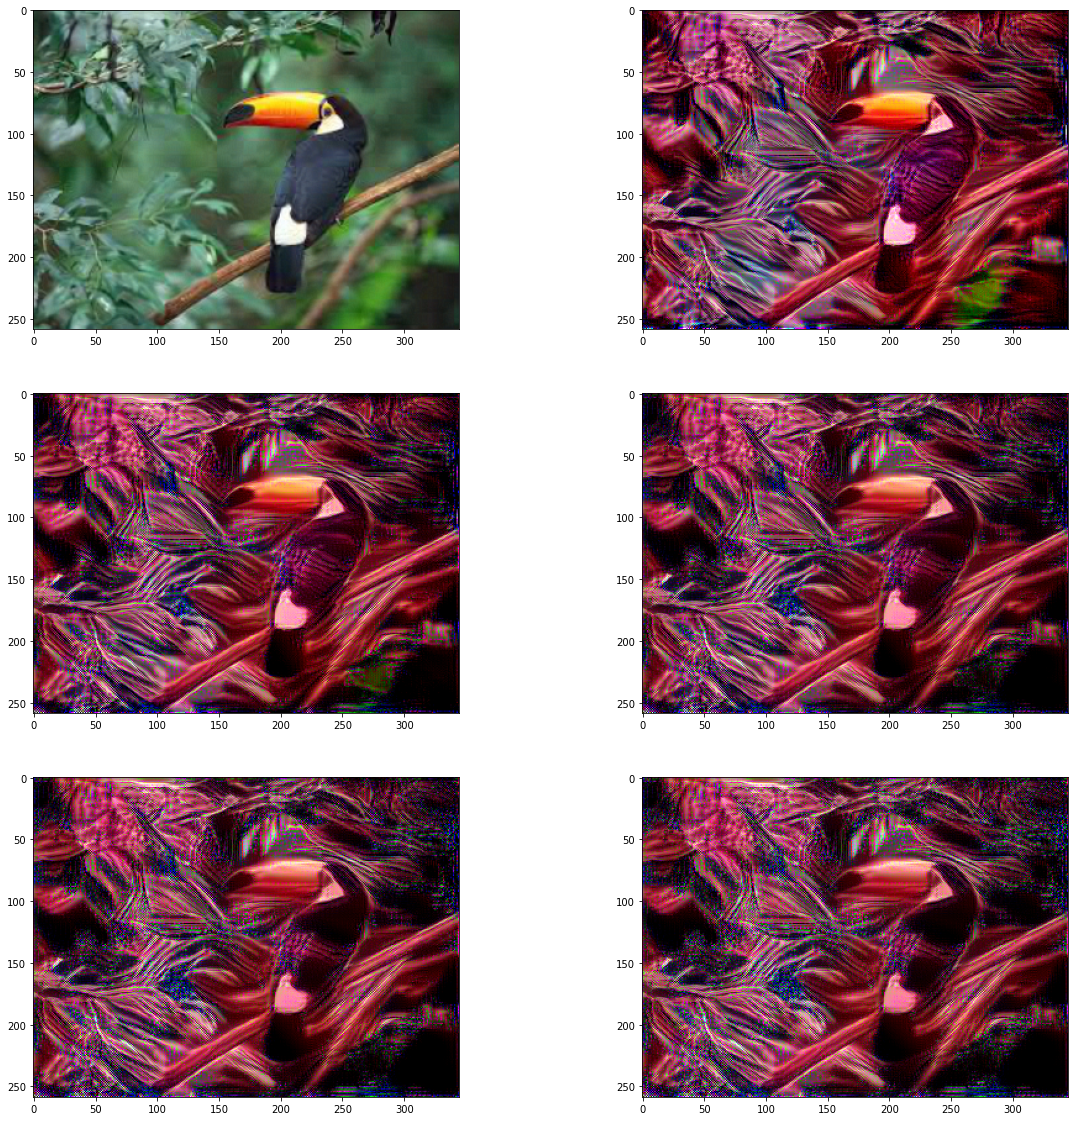

In [110]:
plt.figure(figsize=(20,20))
for i in range(len(results)):
  plt.subplot(3,2,i+1)
  plt.imshow(results[i])
plt.show()

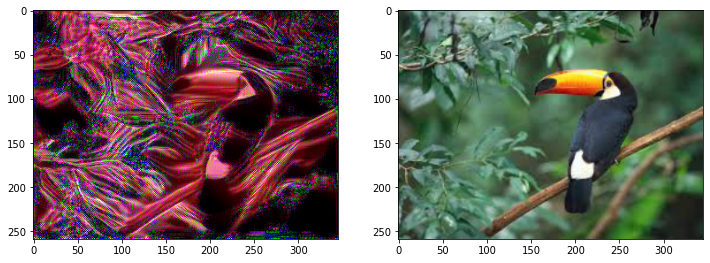

In [111]:
target_copy=decompresser(target.detach())
content_copy=decompresser(content_p)

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))
ax1.imshow(target_copy)
ax2.imshow(content_copy)